In [4]:
symbol = 'BANKNIFTY'
# expiry= '13-Oct-2022'
strike1=39000

strikeUpper = 39500
strikeLower = 38500
# today = '07-Oct-2022'
day = 26
month ='Sep'
year = '2022'

dayE = 29
monthE ='Sep'
yearE = '2022'

In [5]:
if day < 10 :
    val ='0'+str(day)
    today = val+"-"+month+"-"+year
else:
    today = str(day)+"-"+month+"-"+year
# today
if dayE < 10 :
    val ='0'+str(dayE)
    expiry = val+"-"+monthE+"-"+yearE
else:
    expiry = str(dayE)+"-"+monthE+"-"+yearE
# expiry

In [6]:
def get_today_date():
    from datetime import datetime
    date_str = str(datetime.now())
    today=datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return today.strftime('%d-%b-%Y')

# today = get_today_date()#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# expiry= '22-Sep-2022' #<<<<<<<<<<<<<<<<< current expiry
# today = '14-Sep-2022'

def get_hh_mm_time(data_df):
    data_df["timestamp"] = pd.to_datetime(data_df["timestamp"])
    data_df["timestamp"] = data_df["timestamp"].dt.strftime('%H:%M')
    return data_df

def get_path_filename(filename):
    path='D:\Jupyter Python\Stocks-office\json-csv\\'
    newFilename=path+filename
    return newFilename

def get_option_ohlc_csv(symbol):
       
        filename = symbol + '-FULL-OPTIONS-OHLC-' + today + ".csv"
        filename=get_path_filename(filename)

        df=pd.read_csv(filename,index_col=False)
        
        return df
      
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

# symbol ='BANKNIFTY'
lot = 25


option_ohlc = get_option_ohlc_csv(symbol) # read csv file by option type
option_ohlc=get_hh_mm_time(option_ohlc)

option_ohlc['openInterest']=option_ohlc['openInterest']*lot/100000
option_ohlc=option_ohlc[option_ohlc["openInterest"]!=0] # for droping yesterday data in today csv

# option_ohlc["openInterest"]=round(((option_ohlc["openInterest"]*lot)/100000),1)


atm=int(option_ohlc["underlying"].iloc[-1]) # getting value of ATM strike
atm =round(atm/100)*100
max_=atm+500
min_ = atm-500

g1=option_ohlc.groupby("expiryDate")
df_expiry=g1.get_group(expiry)
g2=df_expiry.groupby("optionType")
df_CE=g2.get_group("Call")
df_PE=g2.get_group("Put")
g1_CE=df_CE.groupby("strikePrice")
g1_PE=df_PE.groupby("strikePrice")



In [7]:
data_ce=g1_CE.get_group(strike1).set_index('timestamp')
data_pe=g1_PE.get_group(strike1).set_index('timestamp')

data_ce.index = pd.to_datetime(data_ce.index)
data_pe.index = pd.to_datetime(data_pe.index)

data_ce=data_ce[["lastPrice","vmap"]]
data_pe=data_pe[["lastPrice","vmap"]]

data_pece =pd.merge(data_ce,data_pe,on="timestamp")

data_pece["lastPrice"]=data_pece.lastPrice_x+data_pece.lastPrice_y
data_pece["vmap"]=data_pece.vmap_x+data_pece.vmap_y

data_pece.index=data_pece.index.strftime('%H:%M')

data_pece =data_pece.reset_index()

In [8]:
def get_option_plot_straddle(df,ax,strategy,su,sl):

    ax.plot(df["timestamp"],df["lastPrice"],label='lastPrice',color='blue',linewidth ='2')
    ax.plot(df["timestamp"],df["vmap"],label='vwap',color='green',linewidth ='2')

    ax.grid()
    ax.set_xticks(np.arange(0, len(df)+1,9))# tick labels every (10*3=30)30 min
    for tick in ax.get_xticklabels():  # rotating labels using ax parameter
        tick.set_rotation(63)
    if su != 0:
        ax.set_title(f"{today}-{symbol} {su}-{sl}-{strategy}",size=20)
    else:
        ax.set_title(f"{today}-{symbol} {strike1} {strategy} ",size=20)

    ax.set_ylabel("price",size ='15')
    leg = ax.legend(loc="upper left")

In [9]:
data_ce_upper=g1_CE.get_group(strikeUpper).set_index('timestamp')
data_pe_lower=g1_PE.get_group(strikeLower).set_index('timestamp')

data_ce_upper.index = pd.to_datetime(data_ce_upper.index)
data_pe_lower.index = pd.to_datetime(data_pe_lower.index)

data_ce_upper=data_ce_upper[["lastPrice","vmap"]]
data_pe_lower=data_pe_lower[["lastPrice","vmap"]]

data_pece_comb =pd.merge(data_ce_upper,data_pe_lower,on="timestamp")

data_pece_comb["lastPrice"]=data_pece_comb.lastPrice_x+data_pece_comb.lastPrice_y
data_pece_comb["vmap"]=data_pece_comb.vmap_x+data_pece_comb.vmap_y


data_pece_comb.index=data_pece_comb.index.strftime('%H:%M')

data_pece_comb =data_pece_comb.reset_index()

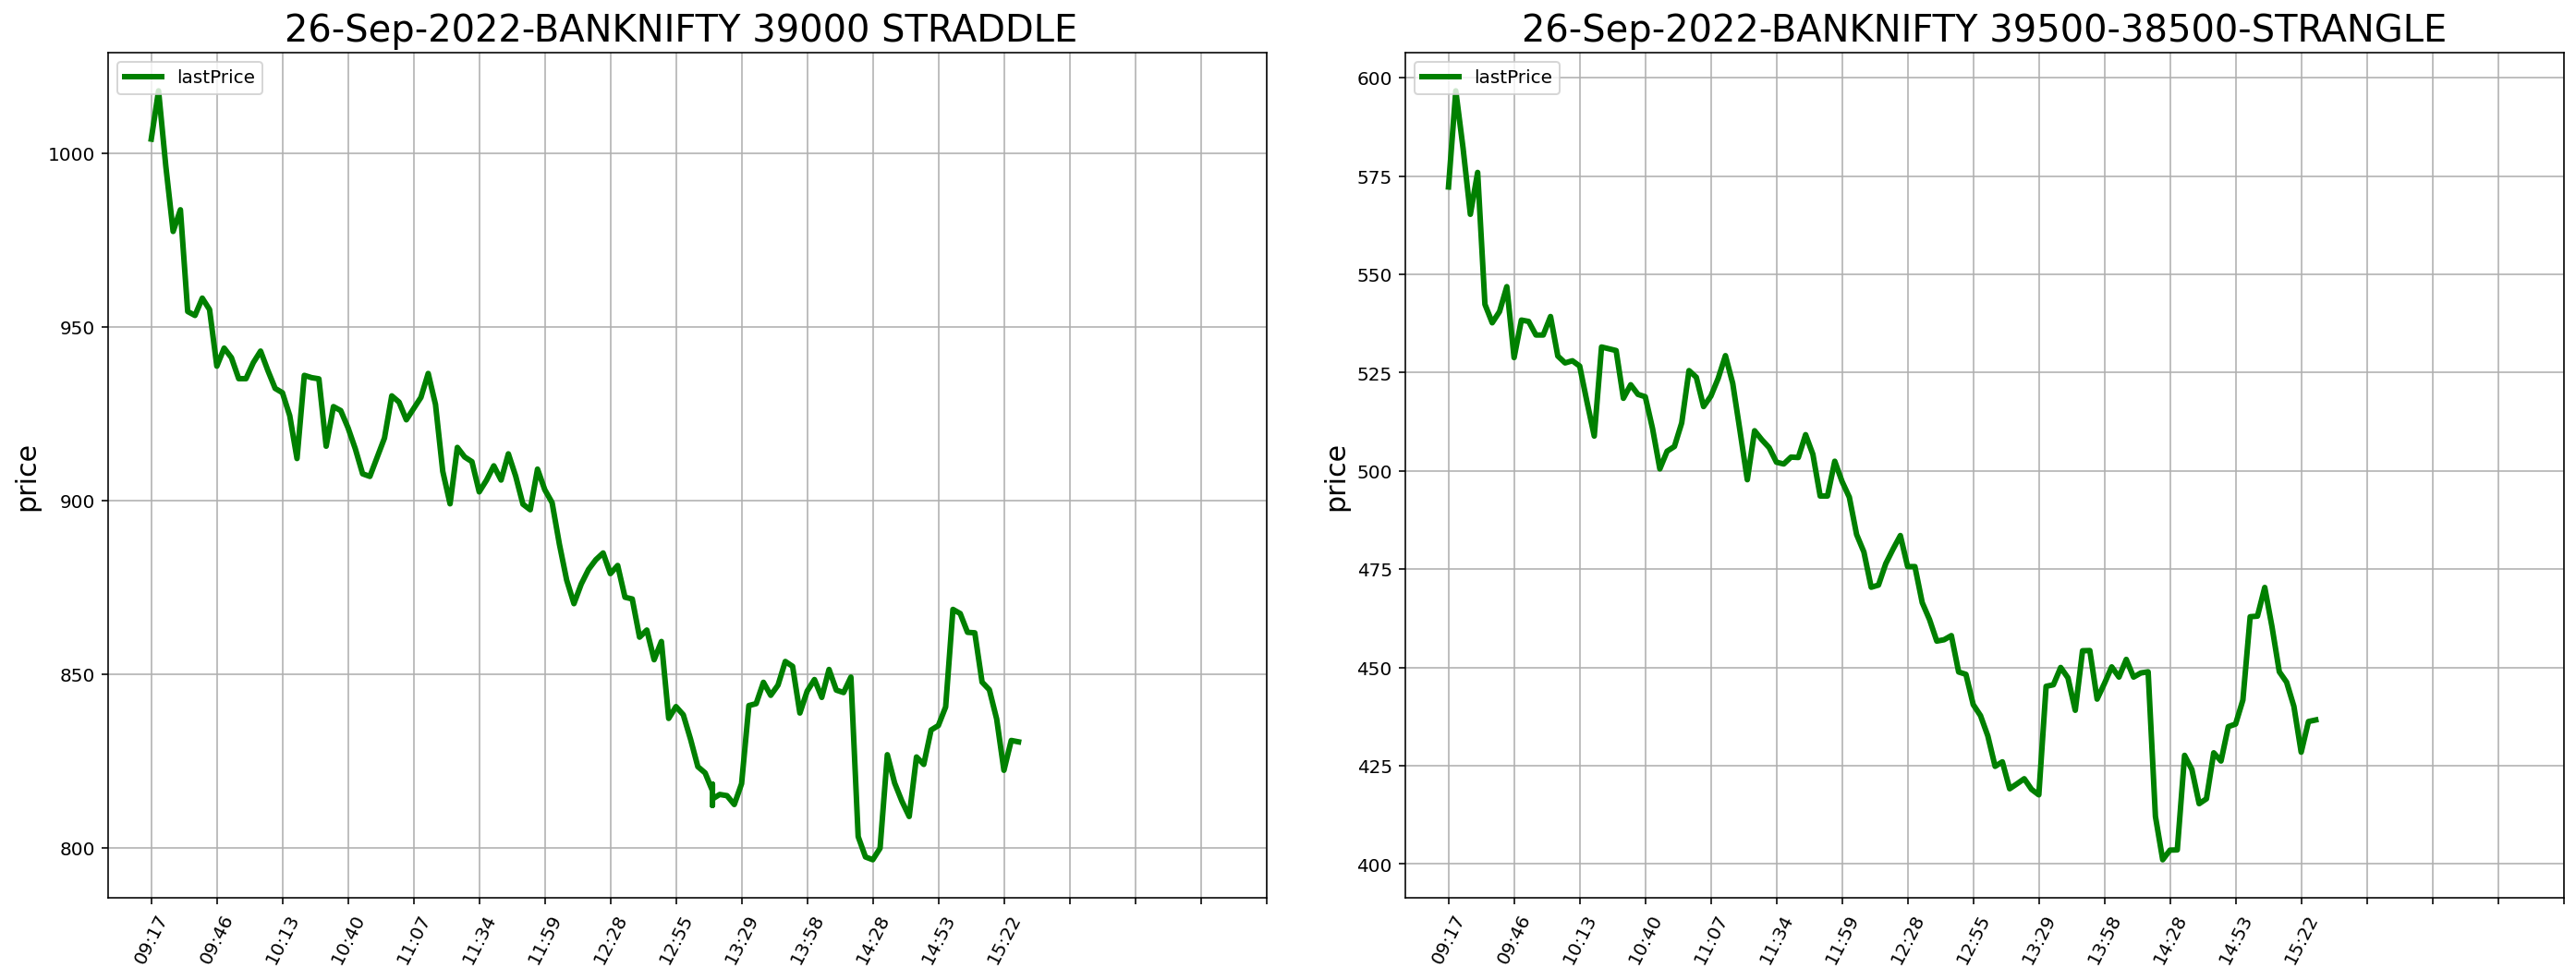

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# plt.suptitle(symbol+f"-{today}",size=20)
get_option_plot_straddle(data_pece,ax1,'STRADDLE',0,0)
get_option_plot_straddle(data_pece_comb,ax2,'STRANGLE',strikeUpper,strikeLower)

fig.tight_layout(pad=3)
plt.show()


## OHLC Details

In [11]:
from datetime import datetime,timedelta
s=datetime.strptime(today,'%d-%b-%Y')
e =datetime.strptime(today,'%d-%b-%Y')
e=e+timedelta(days=1)
s=s.strftime('%Y-%m-%d')
e=e.strftime('%Y-%m-%d')
start=s
end = e

if symbol =='BANKNIFTY':
    val = '^NSEBANK'
else:
    val = "^NSEI"
    
import yfinance as yf
data = yf.download('^NSEBANK',start=start,end=end)

data=round(data,2)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,39027.85,39229.4,38492.2,38616.25,38616.25,241800
